In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from numpy.random import shuffle
from sklearn.datasets import make_classification


In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

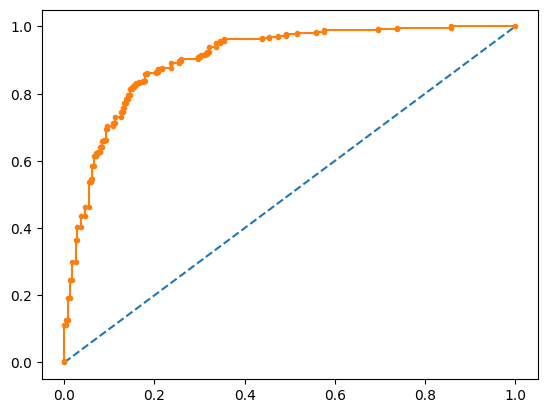

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

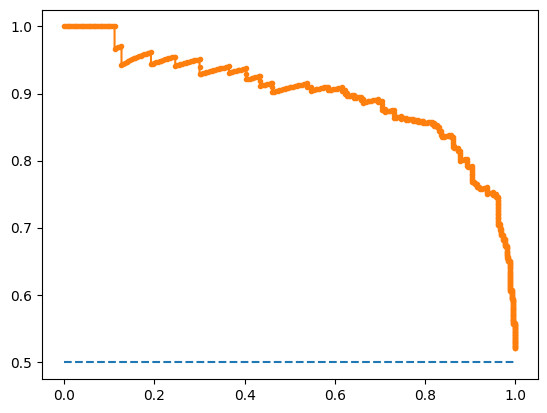

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



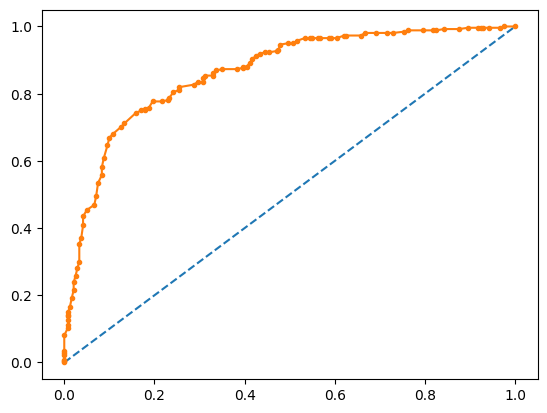

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



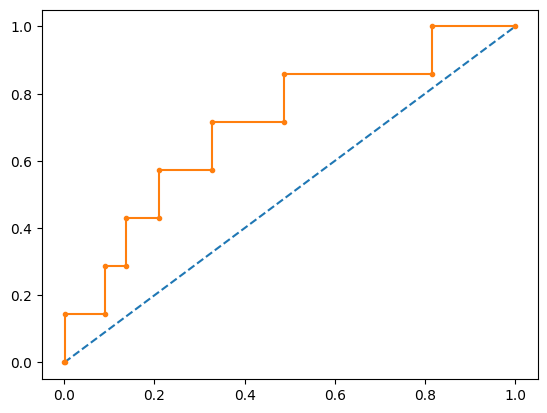

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

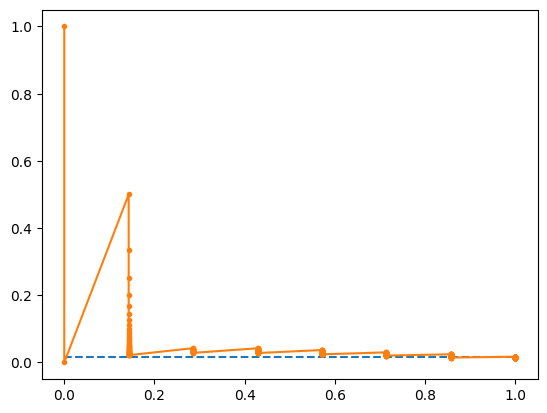

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

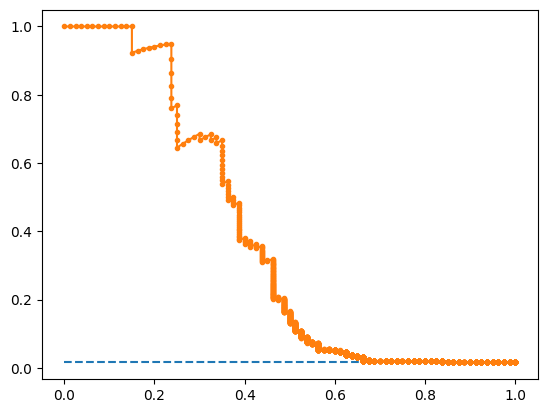

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

Порог=0.205010, F-Score=0.459


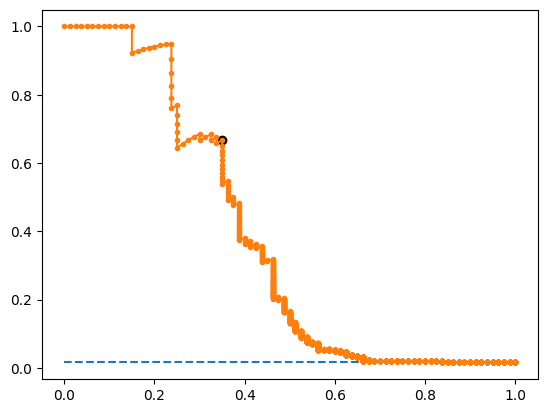

In [ ]:
from numpy import argmax
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.66      0.34      0.45        80

    accuracy                           0.99      5000
   macro avg       0.82      0.67      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.93      0.17      0.29        80

    accuracy                           0.99      5000
   macro avg       0.96      0.59      0.64      5000
weighted avg       0.99      0.99      0.98      5000



# 1.Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

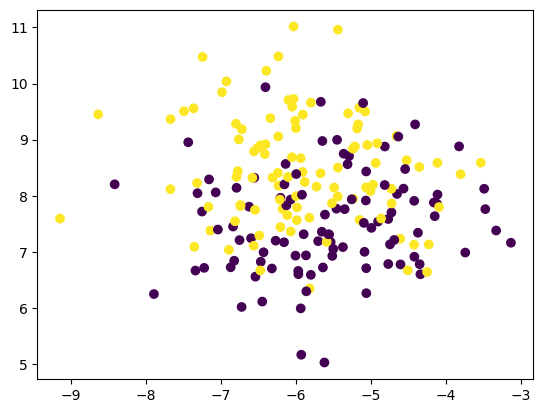

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=2, shuffle=True, random_state=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

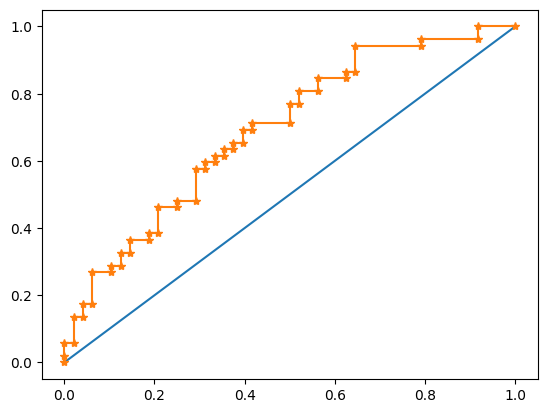

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr, marker='*')
plt.show()

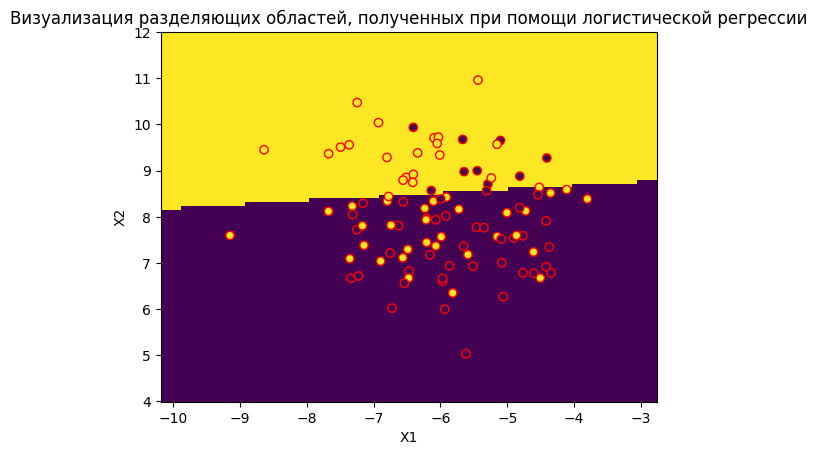

Порог 0.7
              precision    recall  f1-score   support

           0       0.54      0.81      0.65        48
           1       0.68      0.37      0.47        52

    accuracy                           0.58       100
   macro avg       0.61      0.59      0.56       100
weighted avg       0.61      0.58      0.56       100



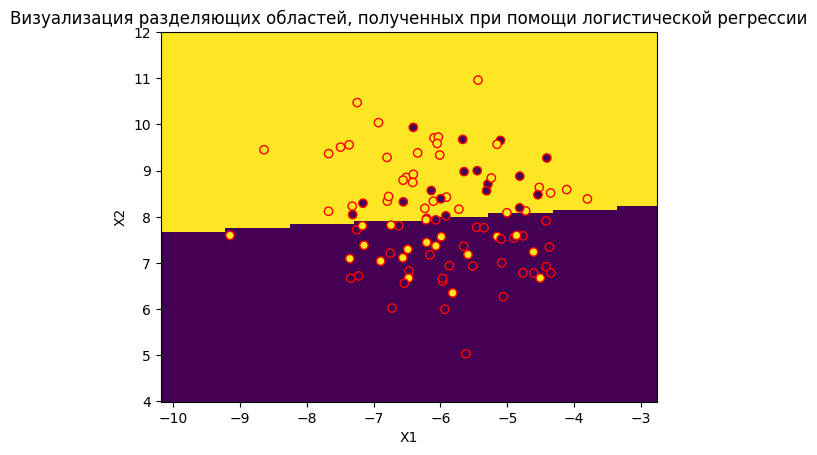

Порог 0.5
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        48
           1       0.65      0.63      0.64        52

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



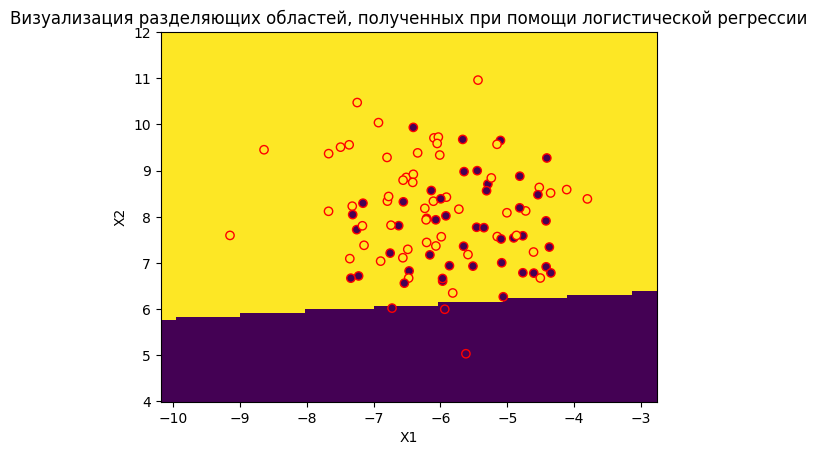

Порог 0.05
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        48
           1       0.54      1.00      0.70        52

    accuracy                           0.55       100
   macro avg       0.77      0.53      0.41       100
weighted avg       0.76      0.55      0.42       100



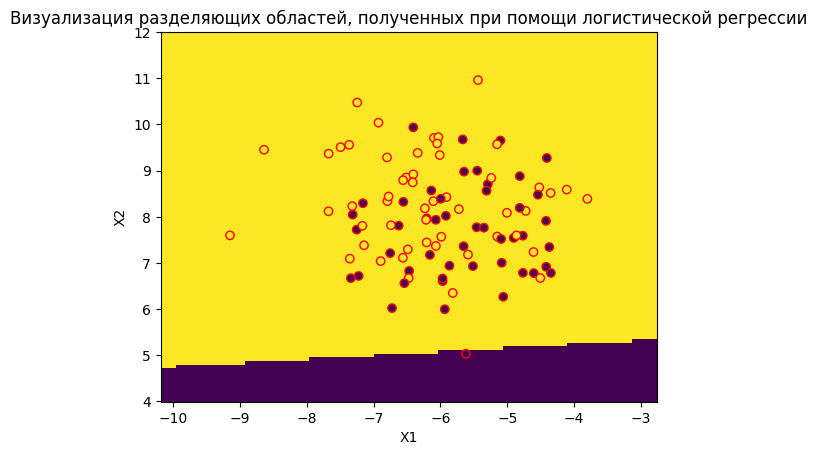

Порог 0.01
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.53      1.00      0.69        52

    accuracy                           0.53       100
   macro avg       0.76      0.51      0.36       100
weighted avg       0.75      0.53      0.38       100



In [ ]:
for i in [0.7, 0.5, 0.05, 0.01]:
    border = i
    X = X_test
    y = y_test
    X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > border).astype('int').reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='red',linewidth=1)

    plt.title('Визуализация разделяющих областей, полученных при помощи логистической регрессии')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print(f"Порог {i}")
    y_pred = (y_pred_proba[:, 1] > i).astype('int')
    print(metrics.classification_report(y_test, y_pred))

при пороге 0.7 точность 58%
при пороге 0.5 точность 63%
при пороге 0.05 точность 55%
при пороге 0.01 точность 53%

# 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [ ]:
data = pd.read_csv('/content/banana_quality.csv')
data

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [ ]:
l = len(data.Quality)
lst = []
for i in range(l):
    if data.Quality[i] == 'Good':
        lst.append(1)
    else:
        lst.append(0)
data.Quality = lst
y = data.Quality
X = data.drop("Quality", axis=1)
y

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: Quality, Length: 8000, dtype: int64

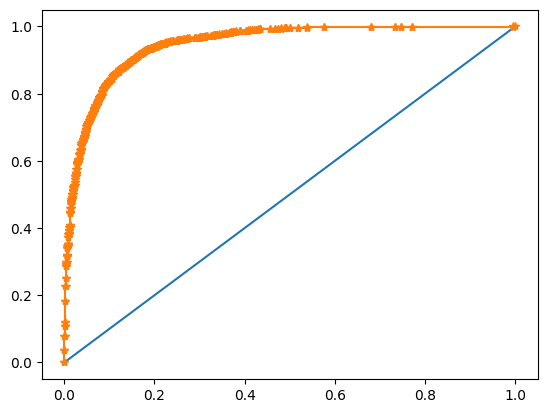

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr, marker='*')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > 0.5).astype('int')
print("Порог 0.5")
print(metrics.classification_report(y_test, y_pred))

Порог 0.5
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1971
           1       0.86      0.89      0.88      2029

    accuracy                           0.87      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



In [ ]:
y_pred = (y_pred_proba[:, 1] > 0.01).astype('int')
print("Порог 0.01")
print(metrics.classification_report(y_test, y_pred))

Порог 0.01
              precision    recall  f1-score   support

           0       1.00      0.25      0.40      1971
           1       0.58      1.00      0.73      2029

    accuracy                           0.63      4000
   macro avg       0.79      0.62      0.57      4000
weighted avg       0.78      0.63      0.57      4000



In [ ]:
y_pred = (y_pred_proba[:, 1] > 0.9).astype('int')
print("Порог 0.9")
print(metrics.classification_report(y_test, y_pred))

Порог 0.9
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1971
           1       0.96      0.58      0.72      2029

    accuracy                           0.77      4000
   macro avg       0.82      0.77      0.76      4000
weighted avg       0.82      0.77      0.76      4000



Порог 0.5 точность = 0.87 плохие и хорошие бананы будут разделены, но иногда будут перепутаны

Порог 0.01 точность = 0.78 все плохие бананы будут отобраны, но некоторые хорошие назовут плохими

Порог 0.99 точноть = 0.82 все хорошие бананы будут отобраны, но некоторые плохие назовут хорошими

# 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

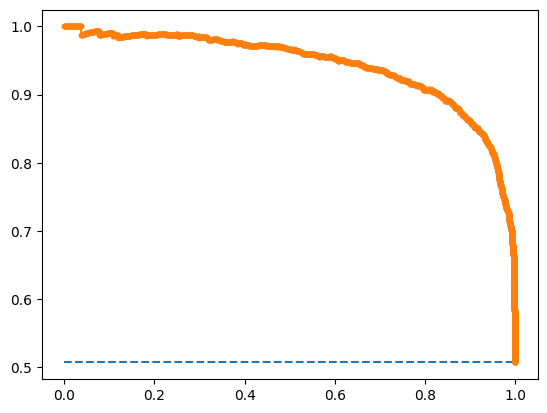

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='*')
plt.show()

Порог=0.396751, F-Score=0.883


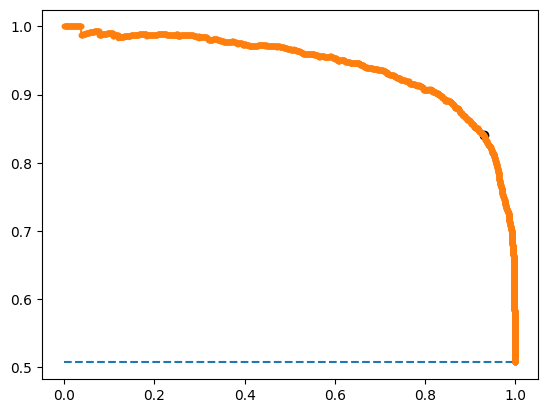

In [ ]:
from numpy import argmax

f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print("Порог ", pr_thresholds[ix])
print(metrics.classification_report(y_test, y_pred))

Порог  0.3967513415791204
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1971
           1       0.84      0.93      0.88      2029

    accuracy                           0.88      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.88      0.88      0.87      4000



мы получили самую высокую точность из рассматриваемых в предыдущем задании

# 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

Порог=0.008739, F_Recall=0.992


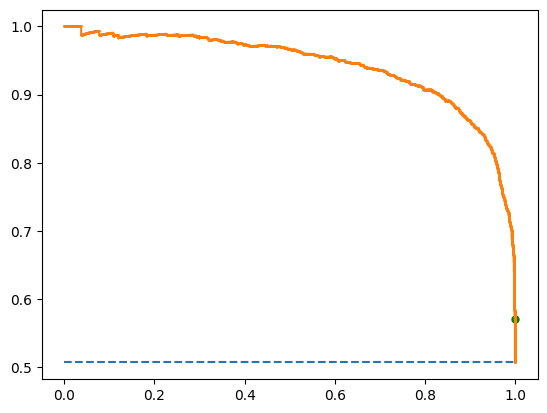

Порог=0.998882, F_Precision=0.997


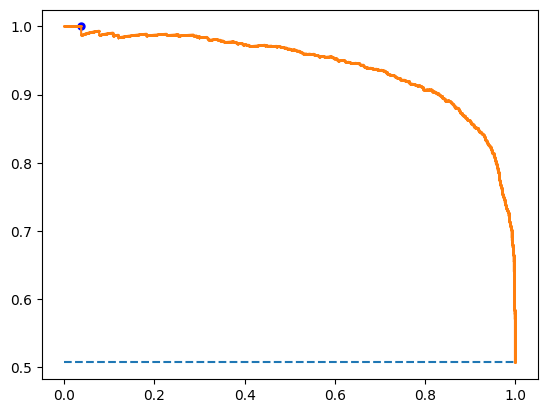

Порог  0.008738762187801756
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      1971
           1       0.57      1.00      0.73      2029

    accuracy                           0.62      4000
   macro avg       0.78      0.61      0.55      4000
weighted avg       0.78      0.62      0.55      4000

Порог  0.9988823063301916
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1971
           1       1.00      0.04      0.07      2029

    accuracy                           0.51      4000
   macro avg       0.75      0.52      0.37      4000
weighted avg       0.75      0.51      0.37      4000



In [ ]:
from numpy import argmax

F_recall = ((1+10**2)*p*r)/((10**2)*p+r)
F_prec = ((1+(0.01)**2)*p*r)/(((0.01)**2)*p+r)
ix = argmax(F_recall)

ix1 = argmax(F_prec)
pr_thresholds[ix]
print('Порог=%f, F_Recall=%.3f' % (pr_thresholds[ix], F_recall[ix]))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='*', markersize = 1)
plt.scatter(r[ix], p[ix], marker='.', color='green', s = 100)
plt.show()


print('Порог=%f, F_Precision=%.3f' % (pr_thresholds[ix1], F_prec[ix1]))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='*', markersize = 1)
plt.scatter(r[ix1], p[ix1], marker='.', color='blue', s = 100)
plt.show()

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print("Порог ", pr_thresholds[ix])
print(metrics.classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix1]).astype('int')
print("Порог ", pr_thresholds[ix1])
print(metrics.classification_report(y_test, y_pred))

Точность выше при оптимизации с использованием Recall